In [1]:
# source: https://dataaspirant.com/2017/01/25/svm-classifier-implemenation-python-scikit-learn/

# Let’s first import the required python packages
# Required Packages

# To Get iris dataset
from sklearn import datasets

# To fit the svm classifier
from sklearn import svm 
import numpy as np
import matplotlib.pyplot as plt            # To visuvalizing the data

In [2]:
# import iris data to model Svm classifier
iris_dataset = datasets.load_iris()

In [4]:
# Using the DESCR key over the iris_dataset, 
# we can get description of the dataset
print("Iris data set Description :: ", iris_dataset['DESCR'])

Iris data set Description ::  .. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== 

In [5]:
# Now let’s get the iris features and the target classes
# Iris Features:
print("Iris feature data :: ", iris_dataset['data'])

Iris feature data ::  [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2

In [6]:
# Iris data set has 4 features:
#  first 2 were sepal length, sepal width and 
# the next 2 were petal length and width. 
# 
# Now let’s check the target data

print("Iris target :: ", iris_dataset['target'])

Iris target ::  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


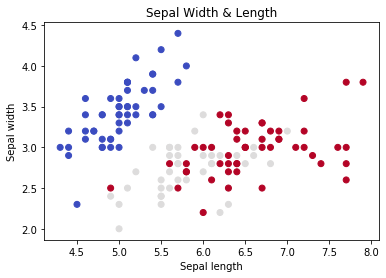

In [7]:
# Visualizing the Iris dataset
# Let’s take the individual features like sepal, petal length, and weight 
# and let’s visualize the corresponding target classes with different colors.
#
# Visualizing the relationship between sepal and target classes
# Visuvalize the Speal features and corresponding target classesPython
def visuvalize_sepal_data():
	iris = datasets.load_iris()
	X = iris.data[:, :2]  # we only take the first two features.
	y = iris.target
	plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
	plt.xlabel('Sepal length')
	plt.ylabel('Sepal width')
	plt.title('Sepal Width & Length')
	plt.show()

#
visuvalize_sepal_data()

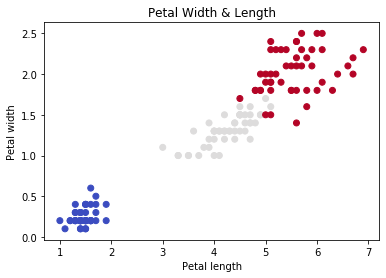

In [8]:
# Let’s create the similar kind of graph for Petal length and width
# Visualizing the relationship between Petal and target classes
# Visuvalizing the Petal vs Iris type
def visuvalize_petal_data():
	iris = datasets.load_iris()
	X = iris.data[:, 2:]  # we only take the last two features.
	y = iris.target
	plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
	plt.xlabel('Petal length')
	plt.ylabel('Petal width')
	plt.title('Petal Width & Length')
	plt.show()

visuvalize_petal_data()

In [11]:
# Use sepal length and width

# Now let’s model different kernel Svm classifier by 
# considering only the Sepal features (Length and Width) 
# and only the Petal features (Lenght and Width)

# Modeling Different Kernel Svm classifier using Iris Sepal features
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the Sepal two features.
y = iris.target
C = 1.0  # SVM regularization parameter

#--------------------------
# Build 4 different Models
#--------------------------

# SVC with linear kernel
svc = svm.SVC(kernel='linear', C=C).fit(X, y)


In [14]:
# LinearSVC (linear kernel)
lin_svc = svm.LinearSVC(C=C).fit(X, y)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [15]:
# SVC with RBF kernel
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)


In [17]:
# SVC with polynomial (degree 3) kernel
poly_svc = svm.SVC(kernel='poly', degree=3, gamma='auto', C=C).fit(X, y)

In [18]:
#---------------------------------------------------------------
# Visualizing the modeled svm classifiers with Iris Sepal features
#---------------------------------------------------------------

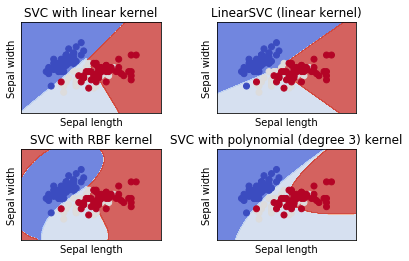

In [19]:
h = .02  # step size in the mesh

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
	                     np.arange(y_min, y_max, h))
# title for the plots
titles = ['SVC with linear kernel',
	   'LinearSVC (linear kernel)',
	    'SVC with RBF kernel',
	    'SVC with polynomial (degree 3) kernel']


for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
	 # Plot the decision boundary. For that, we will assign a color to each
	 # point in the mesh [x_min, x_max]x[y_min, y_max].
	 plt.subplot(2, 2, i + 1)
	 plt.subplots_adjust(wspace=0.4, hspace=0.4)

	 Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

	 # Put the result into a color plot
	 Z = Z.reshape(xx.shape)
	 plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

	 # Plot also the training points
	 plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
	 plt.xlabel('Sepal length')
	 plt.ylabel('Sepal width')
	 plt.xlim(xx.min(), xx.max())
	 plt.ylim(yy.min(), yy.max())
	 plt.xticks(())
	 plt.yticks(())
	 plt.title(titles[i])

plt.show()

In [20]:
#-------------------------------------------------------------------
# Modeling Different Kernel Svm classifier using Iris Petal features
#-------------------------------------------------------------------

In [21]:
iris = datasets.load_iris()
X = iris.data[:, 2:]  # we only take the last two features.
y = iris.target
C = 1.0  # SVM regularization parameter

# SVC with linear kernel
svc = svm.SVC(kernel='linear', C=C).fit(X, y)

# LinearSVC (linear kernel)
lin_svc = svm.LinearSVC(C=C).fit(X, y)

# SVC with RBF kernel
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)

# SVC with polynomial (degree 3) kernel
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [22]:
# NOTE: ------------------------------------------------------------
#       The above code is much similar to the previously modeled 
#       svm classifiers code. The only difference is loading the 
#       Petal features into X variable. The remaining code is just 
#       the copy past from the previously modeled svm classifier code.
#--------------------------------------------------------------------


In [23]:
# Now let’s visualize the each kernel svm classifier to 
# understand how well the classifier fit the Petal features.

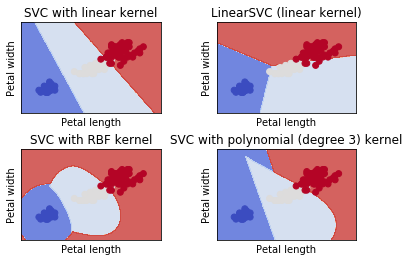

In [24]:
h = .02  # step size in the mesh
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
	            np.arange(y_min, y_max, h))
# title for the plots
titles = ['SVC with linear kernel',
	  'LinearSVC (linear kernel)',
	  'SVC with RBF kernel',
	  'SVC with polynomial (degree 3) kernel']


for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Petal length')
    plt.ylabel('Petal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

In [25]:
# Predicting iris flower category
# To Identify the iris flow type using the modeled svm classifier, 
# we need to call the predict function over the fitted model. 
# For example, if you want to predict the iris flower category using the 
# lin_svc model. We need to call lin_svc.predict(with the features). 
# In our case, these features will include the sepal length and width 
# or petal length and width. 